In [16]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [77]:
test_df = pd.read_csv('CSVs/2017_Offense_Description_Type_Count.csv')
test_df.head()


#offense_zip = pd.read_csv('CSVs/zip cut offe KCPD_Crime_Data_2017.csv')
#offense_zip.head()

,Offense,Description,Type,Count
0,101,Homicide/Non Neglige,Violent,183
1,121,Justifiable Homicide,Violent,14
2,201,Rape,Violent,655
3,210,Forcible Sodomy,Violent,384
4,220,Sexual Assault with,Violent,4


In [103]:
# Count how many sightings have occured within each state
#type_counts = test.groupby("Type")
type_counts["Type"].count()


Type
Non-Violent     63
Property        25
Violent         13
Name: Type, dtype: int64

In [109]:
# Using GroupBy in order to separate the data into fields according to "state" values
#grouped_df = test.groupby(['Type'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
#print(grouped_df["Type"].count())

# In order to be visualized, a data function must be used...
#grouped_df.count().head(10)

grouped_df[["Count"]].count()

,Count
Type,
Non-Violent,63
Property,25
Violent,13


In [110]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this


# X total offense count
# y offense type code


X = test.Count.values.reshape(-1, 1)
y = test.Offense.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X


Shape:  (101, 1) (101, 1)


array([[  183],
       [   14],
       [  655],
       [  384],
       [    4],
       [   17],
       [ 1941],
       [ 4158],
       [ 6958],
       [  689],
       [ 2999],
       [ 8227],
       [ 2288],
       [  153],
       [   99],
       [ 5796],
       [ 9302],
       [ 3988],
       [  160],
       [ 4966],
       [   40],
       [ 4648],
       [ 9281],
       [  891],
       [ 6382],
       [ 8857],
       [   29],
       [ 1593],
       [ 1853],
       [    5],
       [  455],
       [    8],
       [  400],
       [  425],
       [  317],
       [ 1659],
       [ 1141],
       [   52],
       [  373],
       [    4],
       [   83],
       [ 1343],
       [   40],
       [  527],
       [  660],
       [11951],
       [ 1124],
       [   26],
       [   24],
       [  165],
       [  130],
       [    6],
       [  107],
       [   83],
       [   15],
       [   82],
       [  150],
       [  399],
       [    2],
       [  126],
       [ 4888],
       [ 1574],
       [

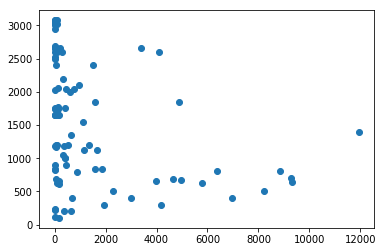

In [111]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [112]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [113]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [149]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [150]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [151]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 9216.0
R-squared (R2 ): 0.0


In [152]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.0

In [115]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-0.14286644]]
y-axis intercept:  [1835.72608661]


In [116]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1]]
Max X Value: [[11951]]


In [126]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

Min y Value: [[1]]
Max y Value: [[11951]]


Text(0, 0.5, 'Offense Type Code')

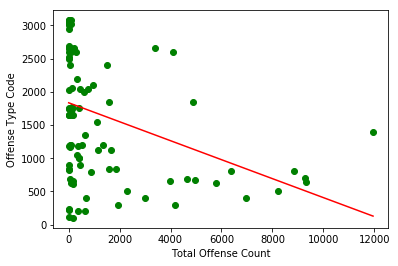

In [125]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='green')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

plt.xlabel("Total Offense Count")
plt.ylabel("Offense Type Code")
### END SOLUTION

In [135]:
training_data = pd.DataFrame({
    "Year":[2017,2016, 2015],
    "Non_Violent":[63,33,99]})
training_data.head(10)

,Year,Non_Violent
0,2017,63
1,2016,33
2,2015,99


In [147]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this


# X total offense count
# y offense type code


X = training_data.Year.values.reshape(-1, 1)
y = training_data.Non_Violent.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (3, 1) (3, 1)


array([[2017],
       [2016],
       [2015]], dtype=int64)

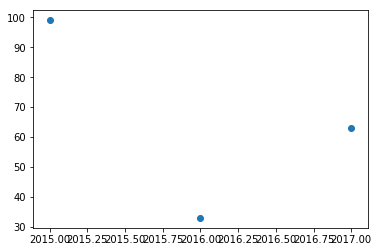

In [148]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [138]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [139]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [140]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-18.]]
y-axis intercept:  [36353.]


In [142]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2015]]
Max X Value: [[2017]]


In [143]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

Text(0, 0.5, 'Offense Type Code')

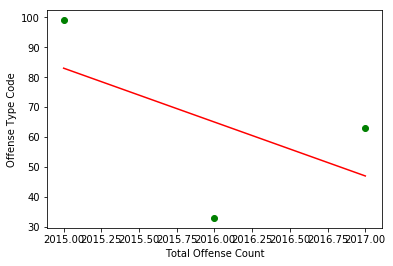

In [144]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='green')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

plt.xlabel("Total Offense Count")
plt.ylabel("Offense Type Code")
### END SOLUTION